# Comparaison masques TM fichiers initiaux et nouvelle grille

In [7]:
from watermark import watermark
%load_ext watermark
print(watermark())

Last updated: 2025-03-27T13:05:54.386975+00:00

Python implementation: CPython
Python version       : 3.12.8
IPython version      : 8.17.2

Compiler    : GCC 13.3.0
OS          : Linux
Release     : 6.8.0-31-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



In [8]:
import xarray as xr
import pandas as pd
import numpy as np
import os
import xesmf as xe
import matplotlib.pyplot as plt
import glob

In [9]:
%watermark --iversions

xesmf     : 0.8.8
pandas    : 2.2.3
xarray    : 2025.1.1
matplotlib: 3.10.0
watermark : 2.5.0
numpy     : 2.0.2



## Test pour un modèle

### Initial

#### Sftlf

In [90]:
path_sftlf_BCC_CSM2 = os.path.join("masques/masques/pseudo_sftlf/", "sftlf_BCC-CSM2-MR.nc")

In [91]:
sftlf_BCC_CSM2 = xr.open_dataset(path_sftlf_BCC_CSM2)
sftlf_BCC_CSM2

<xarray.Dataset> Size: 216kB
Dimensions:   (lon: 320, bnds: 2, lat: 160)
Coordinates:
  * lon       (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
  * lat       (lat) float64 1kB -89.14 -88.03 -86.91 ... 86.91 88.03 89.14
Dimensions without coordinates: bnds
Data variables:
    lon_bnds  (lon, bnds) float64 5kB ...
    lat_bnds  (lat, bnds) float64 3kB ...
    sftlf     (lat, lon) float32 205kB ...
Attributes: (12/54)
    CDI:                    Climate Data Interface version 1.6.8 (http://mpim...
    history:                Wed Sep 04 19:44:19 2019: cdo remapbil,grid_BCC-C...
    source:                 CNRM-CM6-1 (2017):  aerosol: prescribed monthly f...
    institution:            CNRM (Centre National de Recherches Meteorologiqu...
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /scratch/work/voldoire/outputs/CMIP6/DECK/CNRM-CM...
    ...                     ...
    CMIP6_CV_version:       cv=6.2.3.0-7-g2019642
    dr2xml_md5sum:          d6225e658d7de0912fca2a4293dbe2a7
    xios_commit:            1442-shuffle
    nemo_gelato_commit:     49095b3accd5d4c_6524fe19b00467a
    arpege_minor_version:   6.3.2
    CDO:                    Climate Data Operators version 1.6.8 (http://mpim...

In [118]:
sftlf = sftlf_BCC_CSM2["sftlf"]

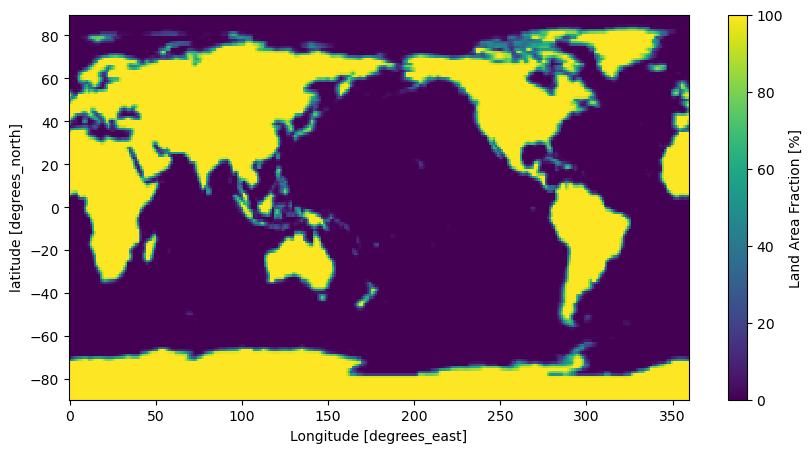

In [92]:
plt.figure(figsize=(10, 5))
sftlf_BCC_CSM2["sftlf"].plot()

In [93]:
frac_sftlf = (sftlf_BCC_CSM2["sftlf"]) / 100
frac_sftlf

<xarray.DataArray 'sftlf' (lat: 160, lon: 320)> Size: 205kB
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lon      (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
  * lat      (lat) float64 1kB -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14

#### Sftgif

In [94]:
path_sftgif_BCC_CSM2 = os.path.join("masques/masques/pseudo_sftgif/", "sftgif_BCC-CSM2-MR.nc")

In [95]:
sftgif_BCC_CSM2 = xr.open_dataset(path_sftgif_BCC_CSM2)
sftgif_BCC_CSM2

<xarray.Dataset> Size: 216kB
Dimensions:   (lon: 320, bnds: 2, lat: 160)
Coordinates:
  * lon       (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
  * lat       (lat) float64 1kB -89.14 -88.03 -86.91 ... 86.91 88.03 89.14
Dimensions without coordinates: bnds
Data variables:
    lon_bnds  (lon, bnds) float64 5kB ...
    lat_bnds  (lat, bnds) float64 3kB ...
    sftgif    (lat, lon) float32 205kB ...
Attributes: (12/54)
    CDI:                    Climate Data Interface version 1.6.8 (http://mpim...
    history:                Tue Sep 03 22:30:58 2019: cdo remapbil,grid_BCC-C...
    source:                 CNRM-CM6-1 (2017):  aerosol: prescribed monthly f...
    institution:            CNRM (Centre National de Recherches Meteorologiqu...
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /scratch/work/voldoire/outputs/CMIP6/DECK/CNRM-CM...
    ...                     ...
    CMIP6_CV_version:       cv=6.2.3.0-7-g2019642
    dr2xml_md5sum:          d6225e658d7de0912fca2a4293dbe2a7
    xios_commit:            1442-shuffle
    nemo_gelato_commit:     49095b3accd5d4c_6524fe19b00467a
    arpege_minor_version:   6.3.2
    CDO:                    Climate Data Operators version 1.6.8 (http://mpim...

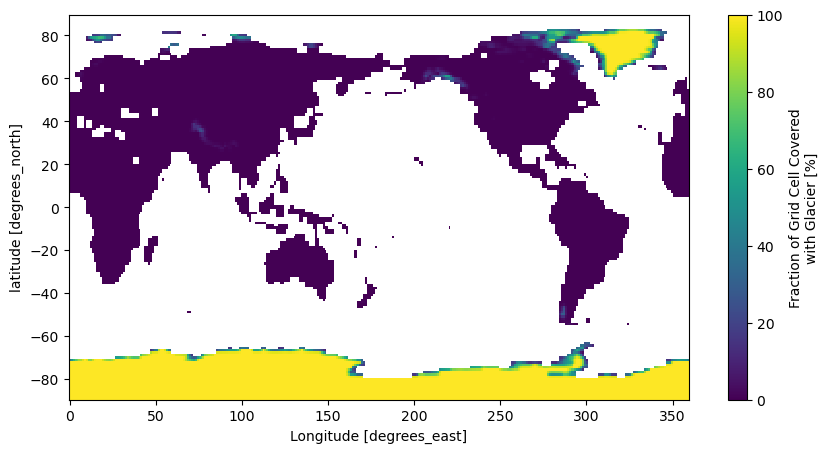

In [96]:
plt.figure(figsize=(10, 5))
sftgif_BCC_CSM2["sftgif"].plot()

#### Difference

In [97]:
diff = sftlf_BCC_CSM2["sftlf"] - sftgif_BCC_CSM2["sftgif"]
diff

<xarray.DataArray (lat: 160, lon: 320)> Size: 205kB
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
  * lat      (lat) float64 1kB -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14

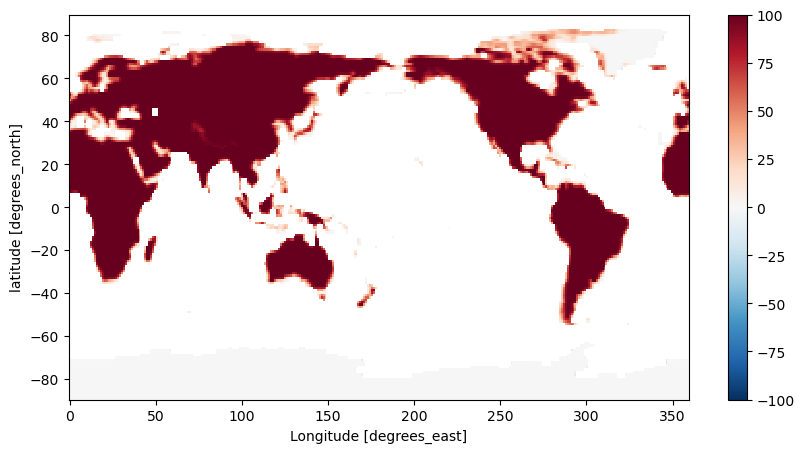

In [98]:
plt.figure(figsize=(10, 5))
diff.plot()

### Regrid

#### Sftlf

In [99]:
path_regrid_sftlf_BCC_CSM2 = os.path.join("interp_sftlf/", "BCC-CSM2-MR_sftlf_reprojete.nc")

In [100]:
regrid_sftlf_BCC_CSM2 = xr.open_dataset(path_regrid_sftlf_BCC_CSM2)
regrid_sftlf_BCC_CSM2

<xarray.Dataset> Size: 264kB
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    sftlf    (lat, lon) float32 259kB ...
Attributes:
    regrid_method:  bilinear

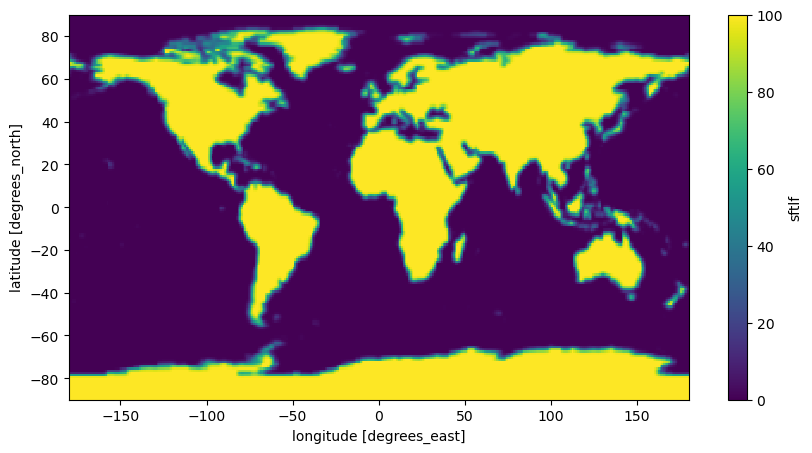

In [101]:
plt.figure(figsize=(10, 5))
regrid_sftlf_BCC_CSM2["sftlf"].plot()

#### Sftgif

In [102]:
path_regrid_sftgif_BCC_CSM2 = os.path.join("interp_sftgif/", "BCC-CSM2-MR_sftgif_reprojete.nc")

In [103]:
regrid_sftgif_BCC_CSM2 = xr.open_dataset(path_regrid_sftgif_BCC_CSM2)
regrid_sftgif_BCC_CSM2

<xarray.Dataset> Size: 264kB
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    sftgif   (lat, lon) float32 259kB ...
Attributes:
    regrid_method:  bilinear

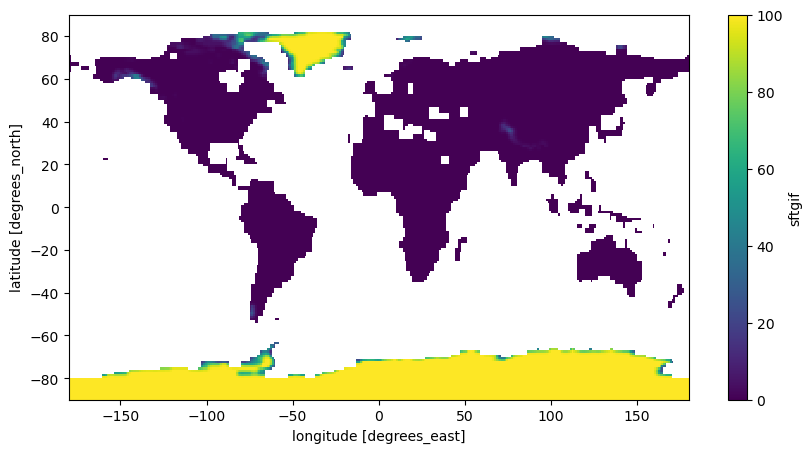

In [104]:
plt.figure(figsize=(10, 5))
regrid_sftgif_BCC_CSM2["sftgif"].plot()

#### Difference

In [105]:
diff_regrid = regrid_sftlf_BCC_CSM2["sftlf"] - regrid_sftgif_BCC_CSM2["sftgif"]
diff_regrid

<xarray.DataArray (lat: 180, lon: 360)> Size: 259kB
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5

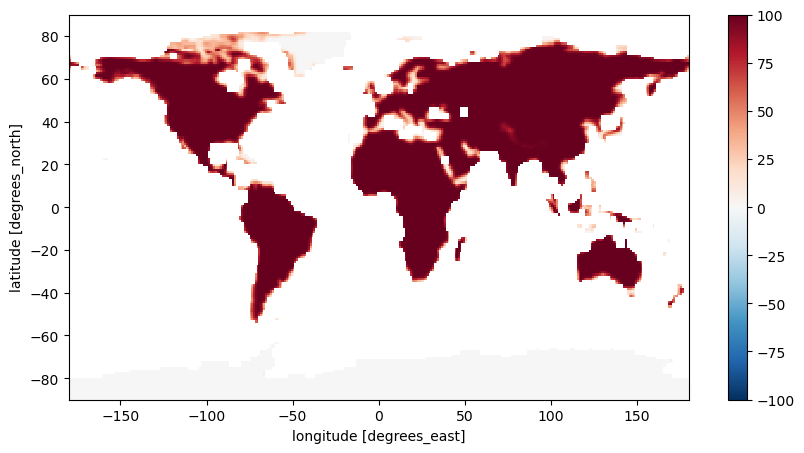

In [106]:
plt.figure(figsize=(10, 5))
diff_regrid.plot()

### Calcul superficie fichier initial

#### Areacella

In [107]:
path_areacella_BCC_CSM2 = os.path.join("masques/masques/pseudo_areacella/", "areacella_BCC-CSM2-MR.nc")

areacella_BCC_CSM2 = xr.open_dataset(path_areacella_BCC_CSM2)
areacella_BCC_CSM2

<xarray.Dataset> Size: 412kB
Dimensions:    (lon: 320, lat: 160)
Coordinates:
  * lon        (lon) float32 1kB 0.0 1.125 2.25 3.375 ... 356.6 357.8 358.9
  * lat        (lat) float32 640B -89.14 -88.03 -86.91 ... 86.91 88.03 89.14
Data variables:
    areacella  (lat, lon) float64 410kB ...
Attributes:
    CDI:          Climate Data Interface version 1.6.8 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    CDO:          Climate Data Operators version 1.6.8 (http://mpimet.mpg.de/...
    history:      Sat Dec 21 01:26:42 2019: ncrename -O --variable cell_area,...

In [69]:
cell_area = areacella_BCC_CSM2["areacella"]

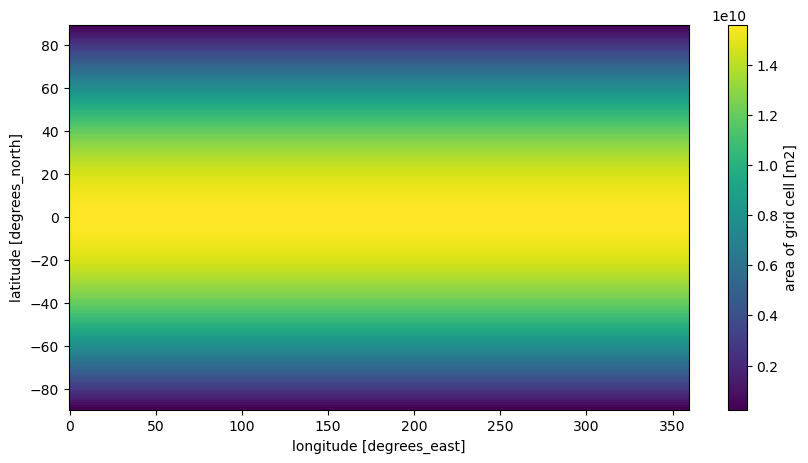

In [70]:
plt.figure(figsize=(10, 5))
cell_area.plot()

#### Pour sftlf

In [76]:
print(sftlf.min().item(), sftlf.max().item(), sftlf.mean().item())
print(sftlf)

0.0 100.0 33.87080383300781
<xarray.DataArray 'sftlf' (lat: 160, lon: 320)> Size: 205kB
array([[100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32)
Coordinates:
  * lon      (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
  * lat      (lat) float64 1kB -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
Attributes:
    standard_name:     land_area_fraction
    long_name:         Land Area Fraction
    units:             %
    grid_type:         gaussian
    online_operation:  once
    cell_methods:      area: mean
    description:       Land Area Fraction
    history:           none


In [84]:
diff_lat = np.abs(sftlf['lat'].values - cell_area['lat'].values)
print("Écart maximum entre les latitudes :", np.max(diff_lat))

Écart maximum entre les latitudes : 3.430957036698601e-06


In [110]:
print("Valeur minimale de sftlf :", sftlf.min().item())
print("Valeur maximale de sftlf :", sftlf.max().item())
print("Moyenne de sftlf :", sftlf.mean().item())

Valeur minimale de sftlf : 0.0
Valeur maximale de sftlf : 100.0
Moyenne de sftlf : 33.87080383300781


In [119]:
print(sftlf.shape, cell_area.shape)
print("Coordonnées égales ?", np.array_equal(sftlf['lat'], cell_area['lat']))

(160, 320) (160, 320)
Coordonnées égales ? False


In [120]:
# comme les lat sont pas exactement les mêmes sur les deux fichiers, il faut interpoler pour faire le calcul
sftlf_aligned = sftlf.interp(lat=cell_area['lat'], lon=cell_area['lon'], method='nearest')

In [121]:
surface_totale = (sftlf_aligned / 100) * (cell_area * 1e-6)
superficie_terrestre = surface_totale.sum().item()

print(f"Superficie terrestre totale calculée : {superficie_terrestre:.2e} km²")

Superficie terrestre totale calculée : 1.49e+08 km²


#### Pour diff (sans Antarc + Greenl)

In [122]:
diff_lat_diff = np.abs(diff['lat'].values - cell_area['lat'].values)
print("Écart maximum entre les latitudes :", np.max(diff_lat_diff))

Écart maximum entre les latitudes : 3.430957036698601e-06


In [123]:
diff_aligned = diff.interp(lat=cell_area['lat'], lon=cell_area['lon'], method='nearest')

In [125]:
print("Valeur minimale de diff :", diff.min().item())
print("Valeur maximale de diff :", diff.max().item())
print("Moyenne de diff :", diff.mean().item())

Valeur minimale de diff : -18.71788787841797
Valeur maximale de diff : 100.0
Moyenne de diff : 59.32091522216797


In [126]:
surface_wo_AG = (diff_aligned / 100) * (cell_area * 1e-6)
superficie_wo_AG = surface_wo_AG.sum().item()

print(f"Superficie terrestre wo AG calculée : {superficie_wo_AG:.2e} km²")

Superficie terrestre wo AG calculée : 1.28e+08 km²


### Calcul superficie fichier nouvelle grille

#### Areacella

In [128]:
path_areacella_regrid_BCC_CSM2 = os.path.join("interp_areacella/", "BCC-CSM2-MR_areacella_reprojete.nc")

areacella_regrid_BCC_CSM2 = xr.open_dataset(path_areacella_regrid_BCC_CSM2)

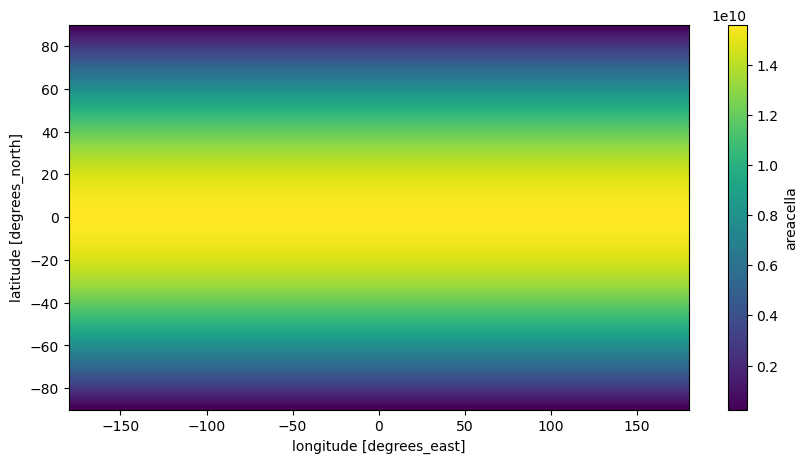

In [129]:
cell_area_regrid = areacella_regrid_BCC_CSM2["areacella"]

plt.figure(figsize=(10, 5))
cell_area_regrid.plot()

#### Pour sftlf

In [130]:
sftlf_regrid = regrid_sftlf_BCC_CSM2["sftlf"]

In [131]:
print(sftlf_regrid.min().item(), sftlf_regrid.max().item(), sftlf_regrid.mean().item())
print(sftlf_regrid)

0.0 100.0 33.91508483886719
<xarray.DataArray 'sftlf' (lat: 180, lon: 360)> Size: 259kB
array([[100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5


In [132]:
diff_lat_regrid = np.abs(sftlf_regrid['lat'].values - cell_area_regrid['lat'].values)
print("Écart maximum entre les latitudes :", np.max(diff_lat_regrid))

Écart maximum entre les latitudes : 0.0


In [133]:
print("Valeur minimale de sftlf_regrid :", sftlf_regrid.min().item())
print("Valeur maximale de sftlf_regrid :", sftlf_regrid.max().item())
print("Moyenne de sftlf_regrid :", sftlf_regrid.mean().item())

Valeur minimale de sftlf_regrid : 0.0
Valeur maximale de sftlf_regrid : 100.0
Moyenne de sftlf_regrid : 33.91508483886719


In [134]:
surface_totale_regrid = (sftlf_regrid / 100) * (cell_area_regrid * 1e-6)  # Conversion en km²
superficie_terrestre_regrid = surface_totale_regrid.sum().item()  # Somme totale

print(f"Superficie terrestre totale calculée nouvelle grille : {superficie_terrestre_regrid:.2e} km²")

Superficie terrestre totale calculée nouvelle grille : 1.87e+08 km²


#### Pour diff (sans Antarc + Greenl)

In [135]:
diff_lat_diff_regrid = np.abs(diff_regrid['lat'].values - cell_area_regrid['lat'].values)
print("Écart maximum entre les latitudes :", np.max(diff_lat_diff_regrid))

Écart maximum entre les latitudes : 0.0


In [136]:
surface_wo_AG_regrid = (diff_regrid / 100) * (cell_area_regrid * 1e-6)
superficie_wo_AG_regrid = surface_wo_AG_regrid.sum().item()

print(f"Superficie terrestre wo AG calculée : {superficie_wo_AG_regrid:.2e} km²")

Superficie terrestre wo AG calculée : 1.54e+08 km²


### Differences superficie initial / regrid

In [137]:
diff_superficie_totale = superficie_terrestre_regrid - superficie_terrestre
print(diff_superficie_totale)

38894405.95237738


In [138]:
diff_superficie_wo_AG = superficie_wo_AG_regrid - superficie_wo_AG
print(diff_superficie_wo_AG)

25560884.47349353
